In [1]:
from NuRadioMC.SignalGen import askaryan as ask
from NuRadioReco.utilities import units, fft
import numpy as np
import matplotlib.pyplot as plt

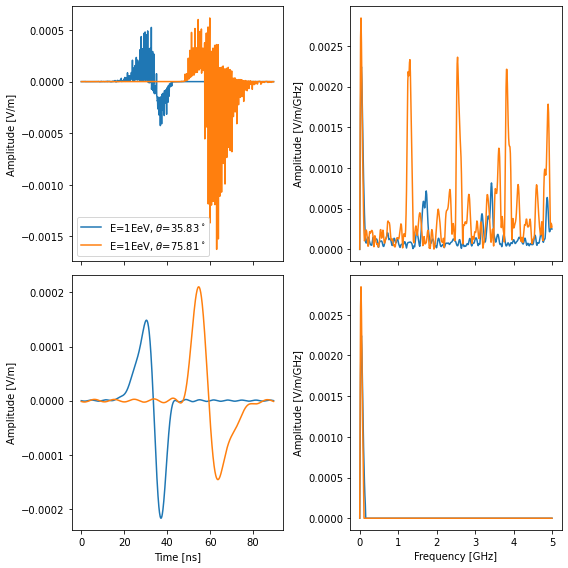

In [2]:
N = 896
dt = 1e-10 * units.second
theta1 = (55.82 - 19.99)*units.deg
theta2 = (55.82 + 19.99)*units.deg
sr = 1/dt
ff = np.fft.rfftfreq(N, dt)


for iN in range(1):
    trace1 = ask.get_time_trace(energy=1*units.EeV,
                            theta=theta1,
                            N=N,
                            dt=dt,
                            shower_type="had",
                            n_index=1.78,
                            R=1*units.km,
                            model="ARZ2020",
                            iN=iN)

    trace2 = ask.get_time_trace(energy=1*units.EeV,
                            theta=theta2,
                            N=N,
                            dt=dt,
                            shower_type="had",
                            n_index=1.78,
                            R=1*units.km,
                            model="ARZ2020",
                            iN=iN)

    trace_spectrum1 = fft.time2freq(trace1, sampling_rate=sr)
    trace_spectrum2 = fft.time2freq(trace2, sampling_rate=sr)

    
    freqs = np.abs(trace_spectrum1)
    i = 0
    while  i+2 < freqs.shape[0] and (not (freqs[i] > freqs[i+1] < freqs[i+2])):
        i = i + 1

    mask1 = ff < ff[i] #* units.MHz
    
    freqs = np.abs(trace_spectrum2)
    i = 0
    while  i+2 < freqs.shape[0] and (not (freqs[i] > freqs[i+1] < freqs[i+2])):
        i = i + 1

    mask2 = ff < ff[i] #* units.MHz
    
    """ 
    max_freq = lambda x: 5000*np.exp(np.abs(x/units.deg - 56)*(-np.log(5)/10)) * units.MHz
    #max_freq = lambda x: (5000 - np.abs(x/units.deg - 56)*240) * units.MHz
    mask1 = ff < max_freq(theta1)
    mask2 = ff < max_freq(theta2)
     """

    trace_spectrum_filtered1 = np.zeros((trace_spectrum1.shape), dtype=np.complex)
    trace_spectrum_filtered1[mask1] = trace_spectrum1[mask1]
    trace_filtered1 = fft.freq2time(trace_spectrum_filtered1, sampling_rate=sr)


    trace_spectrum_filtered2 = np.zeros((trace_spectrum2.shape), dtype=np.complex)
    trace_spectrum_filtered2[mask2] = trace_spectrum2[mask2]
    trace_filtered2 = fft.freq2time(trace_spectrum_filtered2, sampling_rate=sr)

    time = np.arange(0, N)*dt / units.nanosecond

    fig, ax = plt.subplots(2,2, figsize=(8,8), sharex='col')
    ax[0,0].plot(time, trace1/units.volt*units.meter, label=r'E=1EeV, $\theta$=35.83$^\circ$')
    ax[0,0].plot(time, trace2/units.volt*units.meter, label=r'E=1EeV, $\theta$=75.81$^\circ$')
    ax[0,0].set_ylabel('Amplitude [V/m]')
    ax[0,0].legend()
    ax[0,1].plot(ff/units.GHz, np.abs(trace_spectrum1))
    ax[0,1].plot(ff/units.GHz, np.abs(trace_spectrum2))
    ax[0,1].set_ylabel('Amplitude [V/m/GHz]')
    ax[1,1].plot(ff/units.GHz, np.abs(trace_spectrum_filtered1))
    ax[1,1].plot(ff/units.GHz, np.abs(trace_spectrum_filtered2))
    ax[1,1].set_xlabel('Frequency [GHz]')
    ax[1,1].set_ylabel('Amplitude [V/m/GHz]')
    ax[1,0].plot(time, trace_filtered1/units.volt*units.meter)
    ax[1,0].plot(time, trace_filtered2/units.volt*units.meter)
    ax[1,0].set_xlabel('Time [ns]')
    ax[1,0].set_ylabel('Amplitude [V/m]')
    fig.tight_layout()

In [ ]:
signals_filtered = np.load('/mnt/md0/aholmberg/data/signal_had_15_filtered.npy')
data = np.load('/mnt/md0/aholmberg/data/signal_had_15.npy')
condition = data[:,:2]
shower_n = data[:,3]

In [ ]:
i = 1190
plt.plot(signals_filtered[i,:], label=f'E = {condition[i,0]:.2E}, $\\theta$={condition[i,1]/units.deg :.2f}$^\circ$')
plt.legend()